In [1]:
# Import Global & Machine Learning Libraries
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
train: ImageDataGenerator
test: ImageDataGenerator
train_folder = '../data/train/'
test_folder = '../data/test/'

In [3]:
# Instanciate Image Pre-Processing
train_generator = ImageDataGenerator(rescale=1/255.0)

train = train_generator.flow_from_directory(
    directory=train_folder,
    target_size=(250, 250),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=163,
)

test_generator = ImageDataGenerator(rescale=1/255.0)

test = test_generator.flow_from_directory(
    directory=test_folder,
    target_size=(250, 250),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=312,
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
# Launch Image Pre-Processing
train_normal = train[0]
train_pneumonia = train[1]

In [5]:
# Reshape Data
# for reshape : len(train[0][1]) == sample size
train_normal_data = train_normal[0].reshape(len(train_normal[1]), -1) 
train_normal_target = train_normal[1]
train_pneumonia_data = train_pneumonia[0].reshape(len(train_pneumonia[1]), -1)
train_pneumonia_target = train_pneumonia[1]

train_pneumonia_data.shape

(163, 62500)

In [6]:
# Regroup data & labels
train_data = [*train_normal_data, *train_pneumonia_data]
train_target = [*train_normal_target, *train_pneumonia_target]

In [7]:
test_normal = test[0]
test_pneumonia = test[1]

In [8]:
test_normal_data = test_normal[0].reshape(len(test_normal[1]), -1)
test_normal_target = test_normal[1]
test_pneumonia_data = test_pneumonia[0].reshape(len(test_pneumonia[1]), -1)
test_pneumonia_target = test_pneumonia[1]

test_pneumonia_data.shape

(312, 62500)

In [9]:
test_data = [*test_normal_data, *test_pneumonia_data]
test_target = [*test_normal_target, *test_pneumonia_target]

In [10]:
# Model Creation
model=LogisticRegression(max_iter=1000)

# Model Training
model.fit(train_data,train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# Model Prediction
pred_target = model.predict(test_data)

In [12]:
# Compare Prevision with Real Values
comp=pd.DataFrame(pred_target, test_target)
comp

,0
1.0,1.0
1.0,1.0
0.0,0.0
0.0,1.0
1.0,1.0
...,...
0.0,0.0
1.0,1.0
1.0,1.0
0.0,1.0


In [28]:
# Model Accuracy
a_score = 100 * accuracy_score(test_target, pred_target)
print("La précision du modèle en %:", a_score)

La précision du modèle en %: 77.40384615384616


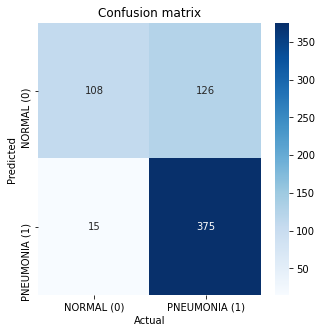

In [29]:
# Confusion Matrix Visualisation
cm = confusion_matrix(test_target, pred_target)

df_cm = pd.DataFrame(cm, index = [i for i in ["NORMAL (0)", "PNEUMONIA (1)"]], 
                                    columns = [i for i in ["NORMAL (0)", "PNEUMONIA (1)"]])
plt.figure(figsize = (5,5))
display_cm = sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

display_cm.set_title('Confusion matrix')
display_cm.set_xlabel('Actual')
display_cm.set_ylabel('Predicted')
display_cm


In [30]:
# Save Model to the disk
if a_score > 75:
    filename = 'Logistic_Regression.sav'
    joblib.dump(model, filename)
    print("model saved")
else:
    print("model too week!")

model saved
